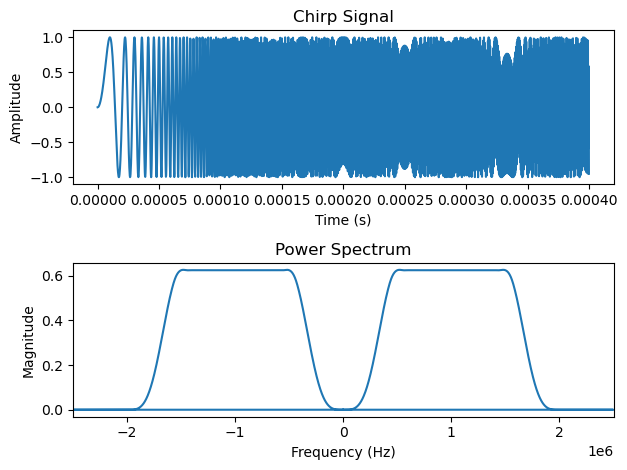

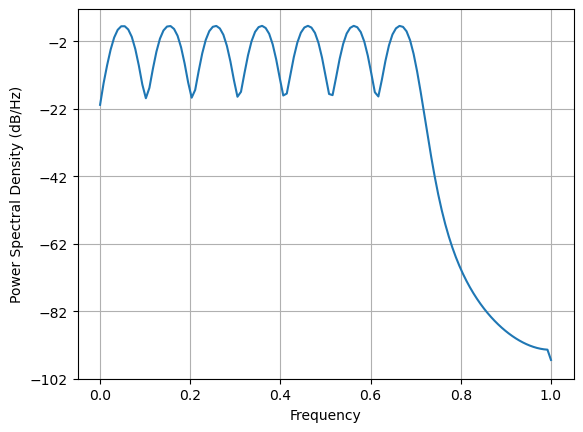

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

# Parameters
duration = 0.0004  # seconds
sampling_rate = 5e6  # Hz
frequency_start = 0  # Hz
frequency_end = 1e6 # Hz
Bi = frequency_end - frequency_start

K = Bi/duration

# Create a time vector
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Generate the chirp signal
frequency = np.linspace(frequency_start, frequency_end, len(t))
chirp_signal = np.sin(2 * np.pi * frequency * t)
#chirp_signal = np.array(np.exp(1j*np.pi*K*t**2))

N = len(chirp_signal)

W = scipy.signal.windows.tukey(N) # FFT window

# Perform FFT
fft_result = scipy.fft.fft(chirp_signal*W)
freq = scipy.fft.fftfreq(len(t), 1 / sampling_rate)

# Plot the chirp signal
plt.subplot(2, 1, 1)
plt.plot(t, chirp_signal)
plt.title('Chirp Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot the power spectrum
plt.subplot(2, 1, 2)
plt.plot(freq, np.abs(fft_result)**2/(len(chirp_signal)))
plt.title('Power Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(-sampling_rate / 2, sampling_rate / 2)

plt.tight_layout()
plt.show()

plt.psd(chirp_signal)
plt.show()
